In [17]:
#!pip install selenium

In [15]:
from selenium.webdriver.common.keys import Keys

import time

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
import pandas as pd
import numpy as np

import re

In [4]:
driver_path = '../driver/chromedriver.exe'
driver = webdriver.Chrome(executable_path = driver_path)

In [5]:
url_page = "https://www.istarbucks.co.kr/index.do"
driver.get(url_page)

# 1 서울 매장

In [6]:
# STORE메뉴
driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03').click()

In [7]:
# 매장 찾기
driver.find_element_by_css_selector("#container > section.store_bn1_section > article > div.store_bn1_btn").click()

In [8]:
# 지역검색
driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a").click()

In [8]:
# 서울 
driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a").click()

In [9]:
# 전체
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [37]:
# 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [38]:
data = soup.find('ul',"li",class_='quickSearchResultBoxSidoGugun')

In [39]:
Info = []
for da in data :
    info = da.find('p').text
    #print(info)

    Info.append(info)

In [40]:
sbucksGu = list()

for i in range(len(Info)) :
    
    G = Info[i].split()[1]
    sbucksGu.append(G)

In [42]:
len(sbucksGu)

499

In [43]:
starbucks = pd.DataFrame({'시': '서울특별시',
                         '구' : sbucksGu})

In [44]:
sum1 = starbucks.groupby('시').size()

In [45]:
sum1

시
서울특별시    499
dtype: int64

# 2 광주 매장 크롤링

In [48]:
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(3) > a').click()

In [49]:
#전체
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [50]:
# 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [51]:
data2 = soup.find('ul',"li",class_='quickSearchResultBoxSidoGugun')

In [54]:
Info2 = []
for da in data2 :
    info = da.find('p').text
    #print(info)

    Info2.append(info)

In [50]:
len(Info2)

## 전체 매장 한 번에 크롤링

In [56]:
driver_path = '../driver/chromedriver.exe'
driver = webdriver.Chrome(executable_path = driver_path)

In [57]:
url_page = "https://www.istarbucks.co.kr/index.do"
driver.get(url_page)

In [6]:
# STORE메뉴
driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03').click()

In [7]:
# 매장 찾기
driver.find_element_by_css_selector("#container > section.store_bn1_section > article > div.store_bn1_btn").click()

In [8]:
# 지역검색
driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a").click()

In [27]:
a = (1,3,4,5,6,7,8)
INFO = []
for i in a :
    # 시도 선택
    driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child({}) > a".format(i)).click()
    time.sleep(3)
    # 구군
    driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()
    time.sleep(3)
    
    # 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")
    
    data = soup.find('ul',"li",class_='quickSearchResultBoxSidoGugun')
    #info = data
    
    Info = []
    for da in data :
        info = da.find('p').text
        #print(info)
        Info.append(info)
    INFO.append(Info)
    print(INFO)
    
    driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a").click()
    time.sleep(5)
    #driver.find_element_by_css_selector("#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a").click()
    #element = driver.find_element_by_xpath('//*[@id="mCSB_2_container"]/ul/li[1]/a')
    #driver.execute_script("arguments[0].click();", element)

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762', '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672', '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668', '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704', '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648', '서울특별시 강남구 언주로 861 (신사동)02-541-3622', '서울특별시 강남구 광평로 281 (수서동)02-6181-3688', '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604', '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562', '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564', '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484', '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467', '서울특별시 강남구 학동로 419 (청담동)02-514-3397', '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496', '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478', '서울특별시 강남구 도곡로 457 (대치동)02-554-3315', '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371', '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306', '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356', '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364', '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347', '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971', '서울특별시 강남구 삼성로 402 (대치동)02-561-3287', '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-3235', '서울특별시 강남구 논현로 752 (논현동,구산빌딩)02-758-8896',

In [29]:
INFO

[['서울특별시 강남구 언주로 425 (역삼동)02-568-3762',
  '서울특별시 강남구 강남대로 538 (논현동)02-3442-3672',
  '서울특별시 강남구 테헤란로 125 (역삼동)02-568-3668',
  '서울특별시 강남구 남부순환로 2947 (대치동)02-568-3704',
  '서울특별시 강남구 테헤란로 518 (대치동)02-568-3648',
  '서울특별시 강남구 언주로 861 (신사동)02-541-3622',
  '서울특별시 강남구 광평로 281 (수서동)02-6181-3688',
  '서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604',
  '서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562',
  '서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564',
  '서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484',
  '서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467',
  '서울특별시 강남구 학동로 419 (청담동)02-514-3397',
  '서울특별시 강남구 도곡로 205 (역삼동)02-565-3496',
  '서울특별시 강남구 강남대로 390 (역삼동)02-561-3478',
  '서울특별시 강남구 도곡로 457 (대치동)02-554-3315',
  '서울특별시 강남구 영동대로 720 (청담동)02-3443-3371',
  '서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306',
  '서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356',
  '서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364',
  '서울특별시 강남구 강남대로 328 (역삼동)02-565-3347',
  '서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971',
  '서울특별시 강남구 삼성로 402 (대치동)02-561-3287',
  '서울특별시 강남구 테헤란로 505 (삼성동) 화진빌딩02-554-323

In [30]:
len(INFO[0])

499

In [31]:
len(INFO[1])

50

In [37]:
len(INFO)

7

In [35]:
Starbucks = pd.DataFrame({'행정구역' : ['서울','광주','대구','대전','부산','울산','인천']})

In [46]:
Starbucks

,행정구역,스타벅스매장수
0,서울,0
1,광주,0
2,대구,0
3,대전,0
4,부산,0
5,울산,0
6,인천,0


In [45]:
Starbucks['스타벅스매장수'] = 0

In [ ]:
Starbucks len(INFO[i]) for i in range(len(INFO))

In [47]:
list = []
for i in range(len(INFO)) :
    a = len(INFO[i])
    list.append(a)
Starbucks['스타벅스매장수'] = list

In [48]:
Starbucks

,행정구역,스타벅스매장수
0,서울,499
1,광주,50
2,대구,63
3,대전,47
4,부산,104
5,울산,25
6,인천,48


In [49]:
Starbucks.to_csv('Starbucks.csv',encoding='EUC-KR', index= False)

## 시각화

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

In [52]:
pop = pd.read_csv('../data/population_Final.csv', encoding='EUC-KR')

In [53]:
Starbucks = pd.merge(Starbucks, pop, on='행정구역')

In [54]:
Starbucks

,행정구역,스타벅스매장수,인구수
0,서울,499,9577030
1,광주,50,1469981
2,대구,63,2927925
3,대전,47,1450439
4,부산,104,3385964
5,울산,25,1144299
6,인천,48,2428301


In [55]:
Starbucks['인구대비스벅매장수'] = Starbucks['스타벅스매장수'] / Starbucks['인구수'].mean() * 100

In [56]:
Starbucks

,행정구역,스타벅스매장수,인구수,인구대비스벅매장수
0,서울,499,9577030,0.015605
1,광주,50,1469981,0.001564
2,대구,63,2927925,0.001970
3,대전,47,1450439,0.001470
4,부산,104,3385964,0.003252
5,울산,25,1144299,0.000782
6,인천,48,2428301,0.001501


In [57]:
Starbucks['전체대비스벅매장수'] = Starbucks['스타벅스매장수'] / Starbucks['스타벅스매장수'].sum() * 100

In [58]:
Starbucks

,행정구역,스타벅스매장수,인구수,인구대비스벅매장수,전체대비스벅매장수
0,서울,499,9577030,0.015605,59.688995
1,광주,50,1469981,0.001564,5.980861
2,대구,63,2927925,0.001970,7.535885
3,대전,47,1450439,0.001470,5.622010
4,부산,104,3385964,0.003252,12.440191
5,울산,25,1144299,0.000782,2.990431
6,인천,48,2428301,0.001501,5.741627


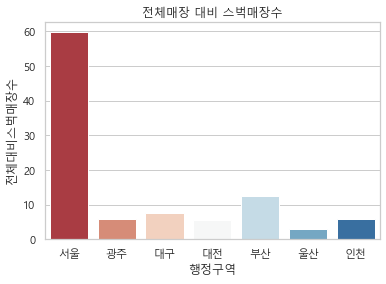

In [64]:
sns.barplot(x='행정구역',y='전체대비스벅매장수', data=Starbucks, palette = 'RdBu')
plt.title('전체매장 대비 스벅매장수')
plt.show()

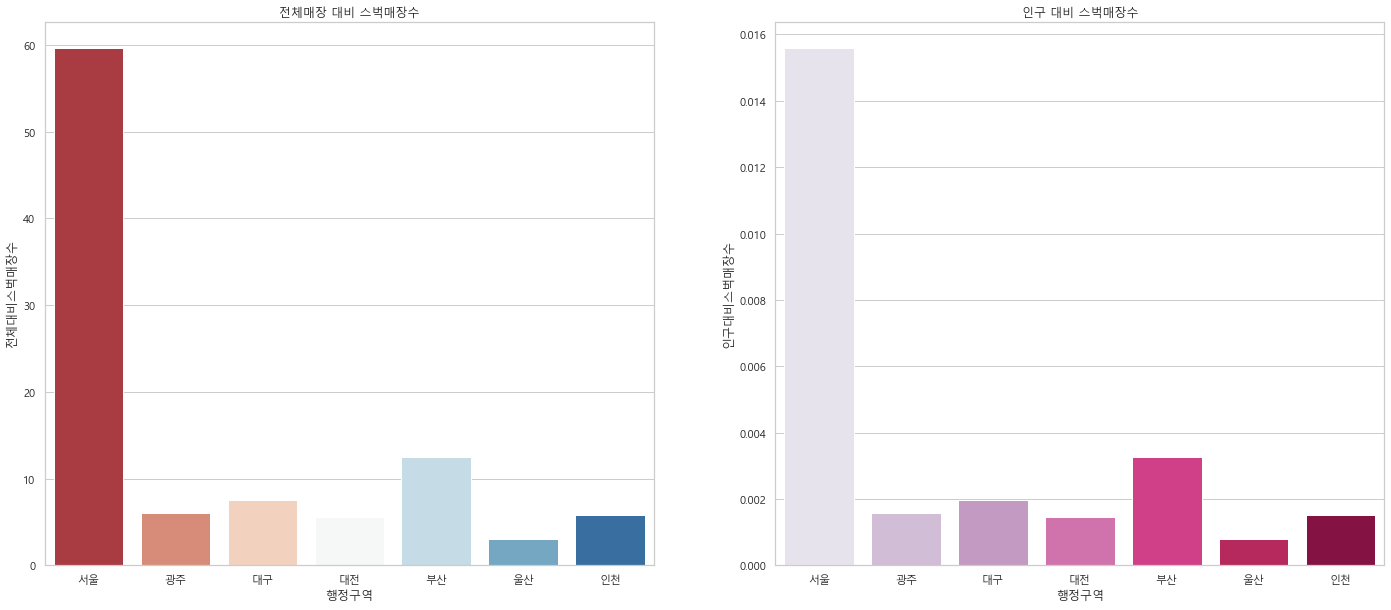

In [67]:
plt.rcParams['figure.figsize'] = (24,10)

plt.subplot(121)
sns.barplot(x='행정구역',y='전체대비스벅매장수', data=Starbucks, palette = 'RdBu')
plt.title('전체매장 대비 스벅매장수')

plt.subplot(122)
sns.barplot(x='행정구역',y='인구대비스벅매장수', data=Starbucks, palette = 'PuRd')
plt.title('인구 대비 스벅매장수')
plt.show()